# Final Project: HR Analytics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, datasets

## 1. Import the Dataset : HR_comma_sep

In [3]:
path = '/Users/carlosalbertoleonliza/AnacondaProjects/projects/datasets/'
data = pd.read_csv(path + 'HR_dataset.csv')

# Change the name of sales to department 
data = data.rename(columns = {'sales':'department'})
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Exploring Dataset

### Some statistics

#### Shape of Dataset

In [4]:
data.shape

(14999, 10)

#### Global Ratios

In [5]:
print('Ratio Employee Churn :','{:.2%}'.format(data['left'].sum()/data['salary'].count()))

Ratio Employee Churn : 23.81%


#### No null Values

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### Histograms

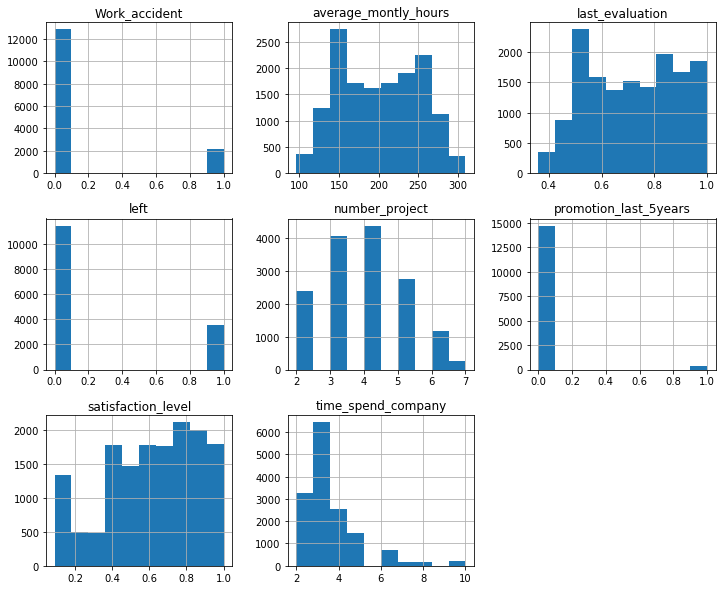

In [7]:
data.hist(figsize=(12,10))
plt.show()

### Powerful Plots

#### This section resumes what is the impact of each feature to Employee Churn. 
`People who are experienced (time_spend_company), work hard (average_montly_hours) and had better scores evaluations are leaving in the company`.

In [8]:
# Applying sobre Tranformations for plotting

grouped0 = data.groupby('left')['Work_accident'].value_counts().unstack().fillna(0).reset_index()
grouped1 = data.groupby('left')['promotion_last_5years'].value_counts().unstack().fillna(0).reset_index()
grouped2 = data.groupby('left')['salary'].value_counts().unstack().fillna(0).reset_index()
grouped3 = data.groupby('left')['department'].value_counts().unstack().fillna(0).reset_index()

#grouped0[2] = grouped0.iloc[:,1:].sum(axis = 1)
#grouped0[0] = grouped0[0]/grouped0[2]
#grouped0[1] = grouped0[1]/grouped0[2]
#grouped0

/Users/carlosalbertoleonliza/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


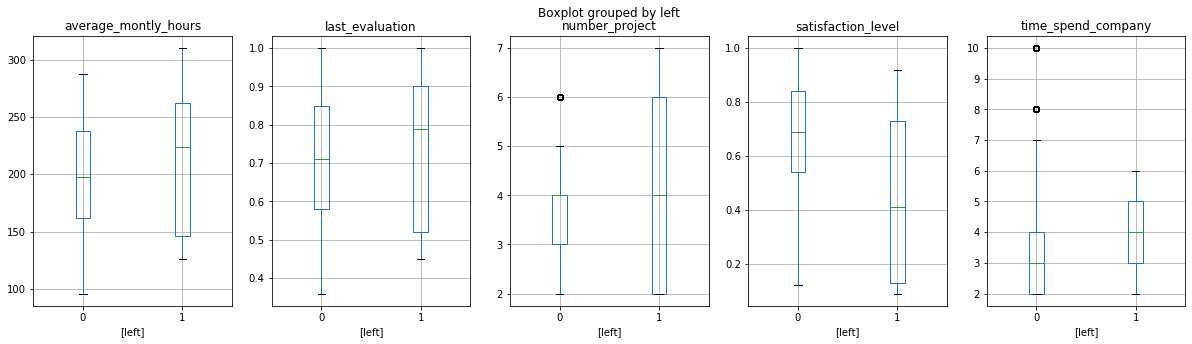

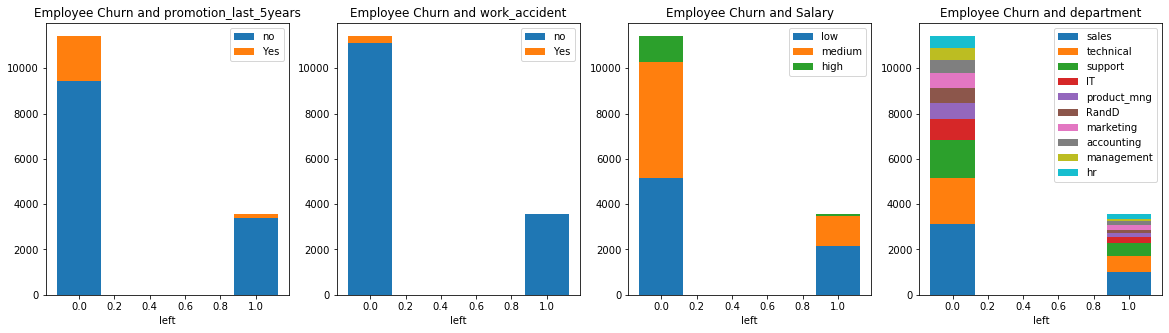

In [9]:
grouped_cols1 = ['satisfaction_level','last_evaluation','average_montly_hours','time_spend_company','number_project',
                 'left']

width = 0.25

#color = dict(boxes='DarkBlue', medians='DarkGreen')
fig, axes = plt.subplots(1,5,figsize=(20, 5))
data[grouped_cols1].boxplot(by = 'left', ax = axes)

fig1, axes1 = plt.subplots(1,4,figsize=(20, 5))
ax0, ax1, ax2, ax3 = axes1.flat

p00 = ax0.bar(grouped0['left'], grouped0[0],width)
p01 = ax0.bar(grouped0['left'], grouped0[1],width, bottom = grouped0[0])
ax0.set_xlabel('left')
ax0.set_title('Employee Churn and promotion_last_5years')
ax0.legend((p00[0], p01[0]), ('no', 'Yes'))

p10 = ax1.bar(grouped1['left'], grouped1[0],width)
p11 = ax1.bar(grouped1['left'], grouped1[1],width, bottom = grouped1[0])
ax1.set_xlabel('left')
ax1.set_title('Employee Churn and work_accident')
ax1.legend((p10[0], p11[0]), ('no', 'Yes'))

p20 = ax2.bar(grouped2['left'], grouped2['low'],width)
p21 = ax2.bar(grouped2['left'], grouped2['medium'],width, bottom = grouped2['low'])
p22 = ax2.bar(grouped2['left'], grouped2['high'],width, bottom = grouped2['low'] + grouped2['medium'])
ax2.set_xlabel('left')
ax2.set_title('Employee Churn and Salary')
ax2.legend((p20[0], p21[0],p22[0]), ('low', 'medium','high'))

p30 = ax3.bar(grouped3['left'], grouped3['sales'],width)
p31 = ax3.bar(grouped3['left'], grouped3['technical'], width,bottom = grouped3['sales'])
p32 = ax3.bar(grouped3['left'], grouped3['support'],width, bottom = grouped3['sales'] + grouped3['technical'])
p33 = ax3.bar(grouped3['left'], grouped3['IT'],width, bottom = grouped3['sales'] + grouped3['technical']+
              grouped3['support'])
p34 = ax3.bar(grouped3['left'], grouped3['product_mng'],width, bottom = grouped3['sales'] + grouped3['technical']+
        grouped3['support']+grouped3['IT'])
p35 = ax3.bar(grouped3['left'], grouped3['RandD'],width, bottom = grouped3['sales'] + grouped3['technical']+
       grouped3['support']+grouped3['IT']+grouped3['product_mng'])
p36 = ax3.bar(grouped3['left'], grouped3['marketing'],width, bottom = grouped3['sales'] + grouped3['technical']+
       grouped3['support']+grouped3['IT']+grouped3['product_mng']+grouped3['RandD'])
p37 = ax3.bar(grouped3['left'], grouped3['accounting'],width, bottom = grouped3['sales'] + grouped3['technical']+
       grouped3['support']+grouped3['IT']+grouped3['product_mng']+grouped3['RandD']+grouped3['marketing'])
p38 = ax3.bar(grouped3['left'], grouped3['management'],width, bottom = grouped3['sales'] + grouped3['technical']+
       grouped3['support']+grouped3['IT']+grouped3['product_mng']+grouped3['RandD']+grouped3['marketing']+
       grouped3['accounting'])
p39 = ax3.bar(grouped3['left'], grouped3['hr'],width, bottom = grouped3['sales'] + grouped3['technical']+
        grouped3['support']+grouped3['IT']+grouped3['product_mng']+grouped3['RandD']+grouped3['marketing']+
       grouped3['accounting']+grouped3['management'])
ax3.set_xlabel('left')
ax3.set_title('Employee Churn and department')
ax3.legend((p30[0], p31[0],p32[0],p33[0],p34[0],p35[0],p36[0],p37[0],p38[0],p39[0]), 
           ('sales','technical','support','IT','product_mng','RandD','marketing','accounting','management','hr'))


In [10]:
# Save plots
fig.savefig('powerplot0.jpeg', bbox_inches='tight', dpi = 400)
fig1.savefig('powerplot1.jpeg', bbox_inches='tight', dpi = 400)

### Relationships between features

#### Transforming categorical data  to numeric

In [11]:
# Detect the values of the two categorical feature for transforming
#print('salary values:',data['salary'].unique().tolist())
#print('sales values:',data['department'].unique().tolist())

In [12]:
# Transform the data to use in correlation and ML algorithm 
data_clean = data.copy()
data_clean = data_clean.replace({'salary':{'low':1,'medium':2, 'high':3}})
data_clean = data_clean.replace({'department':{'sales':1,'accounting':2, 'hr':3, 'technical':4,'support':5, 
                                      'management':6, 'IT':7, 'product_mng':8,'marketing':9, 'RandD':10}})

In [13]:
data_clean.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
department,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


#### With respect of the target 'left', the positive features from the correlation Matrix for Classification analysis are :
#### - time_spend_company
#### - average_montly_hours
##### - number_project
##### - last_evaluation 

### Prepare the data

In [14]:
y = data_clean['left']

#features = ['time_spend_company','average_montly_hours','number_project','last_evaluation','department',
#            'promotion_last_5years','Work_accident','salary','satisfaction_level']

# Select the secuence of features according the corr factor with 'left'
features = ['time_spend_company','average_montly_hours','number_project','last_evaluation','department',
            'promotion_last_5years','Work_accident','salary','satisfaction_level'] 

X_ = data_clean[features]

# Normalize the data
X = (X_ - X_.min())/(X_.max() - X_.min())



### A plot with three features on the plane

Text(0, 0.5, 'average_montly_hours')

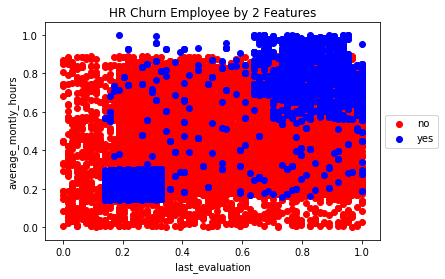

In [16]:
#feature_x = 'satisfaction_level'
#feature_y = 'last_evaluation'
#feature_x = 'time_spend_company'

feature_x = 'last_evaluation'
feature_y = 'average_montly_hours'

plt.scatter(X[y==0][feature_x], X[y==0][feature_y], c = 'red', label = 'no')
plt.scatter(X[y==1][feature_x], X[y==1][feature_y], c = 'blue', label = 'yes')

# The graph
plt.title('HR Churn Employee by 2 Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(feature_x)
plt.ylabel(feature_y)

## 3. Using the Machine Learning Technique

### Since HR Churn Employyes is a Classification problem, i will use KNeighborsClassifier that performs well

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

### KNeighborsClassifier

In [18]:
# Parameters
n_neighbors = 15

# Model
KNN_classifier = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
KNN_classifier.fit(X_train, y_train)
KNN_predictions = KNN_classifier.predict(X_test)

#### Measure Accuracy of the Classifier 

In [19]:
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_true = y_test, y_pred = KNN_predictions)*100)
      +'%')

Accuracy for KNeighbors Classifier: 96.68686868686869%


### Can we detect the best employees that want to leave the company?

In [22]:
# Umbral to leave the company for best employees
umbral = 0.7

# Use the trained classifier to the entire dataset  
KNN_predictions_global = KNN_classifier.predict(X)

# Associate the output with the predicted value 
all_employees_tested = pd.concat([y,pd.Series(KNN_predictions_global, index  = y.index)],axis=1)
all_employees_tested.rename(columns = {'left':'real',0:'pred'}, inplace = True)

# Elaborate the filter for employees who still work and predited to leave the company
criteria0 = all_employees_tested['real'] ==0
criteria1 = all_employees_tested['pred'] ==1

employees_still_working_df  = data[criteria0 & criteria1]

# Aplying the filter for best scores
good_employees_still_working_pred_leave = employees_still_working_df[employees_still_working_df['last_evaluation']
                                                                     >umbral]

In [31]:
# Employees that are predict to leave and the file with all information

# Number of employees who are predicted to leave
print(good_employees_still_working_pred_leave.shape[0])

good_employees_still_working_pred_leave.to_csv('good_employees_still_working_pred_leave.csv')



64


### Can we visualize what are the decision boundaries to leave the company?

In [32]:
from matplotlib.colors import ListedColormap

In [33]:
# Reorder the features for plot purposes

reorder_features = ['last_evaluation','average_montly_hours','time_spend_company','number_project'
                   ,'department','promotion_last_5years','Work_accident','salary','satisfaction_level',] 

X_train_ = X_train[reorder_features]
X_test_ = X_test[reorder_features]

# Sample of the train and test data to see them in the plot 
Xtrain = X_train_[X_train_.index % 100 == 0].iloc[:,:2]
ytrain = y_train[y_train.index % 100 == 0]

Xtest = X_test_[X_test_.index % 100 == 0].iloc[:,:2]
ytest = y_test[y_test.index % 100 == 0]

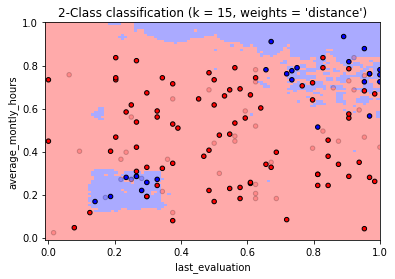

In [34]:
h = .01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data. Test the model with 
# 2 dimensions
clf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
clf.fit(X_train_.iloc[:,:2], y_train)

# Plot the decision boundary. Stablish the range
x_min, x_max = X_train_.iloc[:, 0].min() - 0.01, X_train_.iloc[:, 0].max() + 0.01
y_min, y_max = X_train_.iloc[:, 1].min() - 0.01, X_train_.iloc[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training targets
plt.scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c = ytrain,  cmap = cmap_bold, 
            edgecolor = 'k', s = 20)

# Plot the test targets(ligther)
plt.scatter(Xtest.iloc[:, 0], Xtest.iloc[:, 1], c = ytest,  cmap = cmap_bold, 
            edgecolor = 'k', s = 20, alpha=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, 'distance'))

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

These are the boundaries of the model : ligther blue and ligther red area. The plot also shows the real output HR Churn (solid dots) and predicted (lighter) in blue. 